=== 단기 수익률 기준 윤석열 테마주 vs KODEX200 상관계수 ===
KODEX200    1.000000
삼부토건        0.597677
안랩          0.073027
신원종합개발     -0.035331
NE능률       -0.204592
덕성         -0.426801
Name: KODEX200, dtype: float64


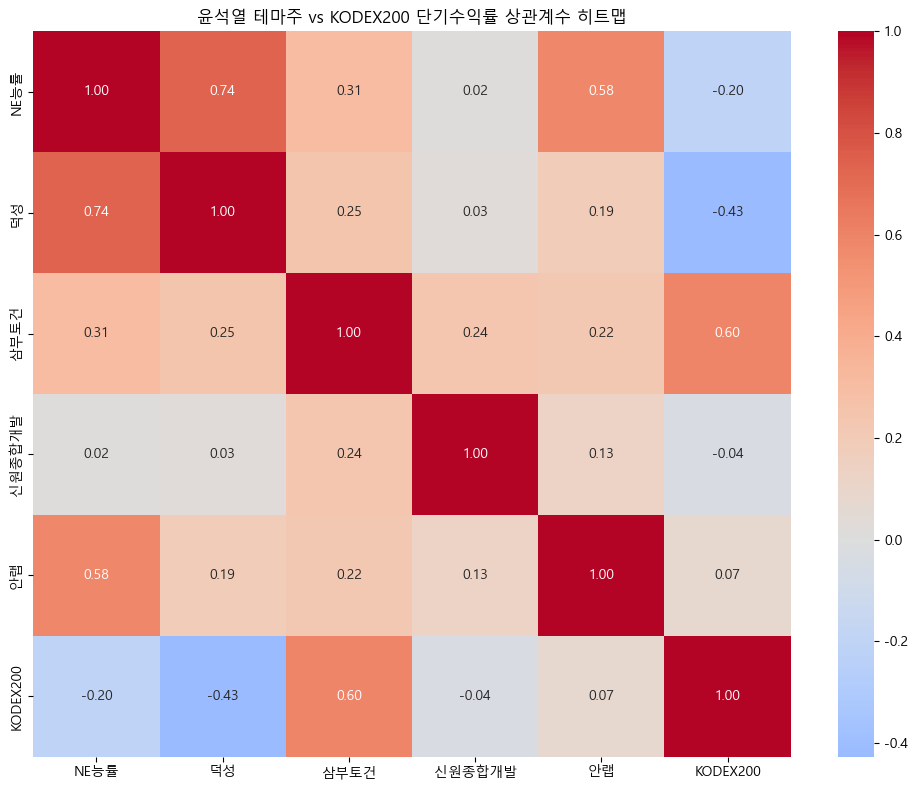

In [2]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False


label_dict = {
    'thema1': 'NE능률',
    'thema2': '덕성',
    'thema3': '삼부토건',
    'thema4': '신원종합개발',
    'thema5' : '안랩'
}


# 날짜 설정
start_date = '2021-10-26' #경선확정일 - 10
end_date = '2021-11-15' #경선확정일 + 10

thema1 = fdr.DataReader('053290', start=start_date, end=end_date) #테마주1
thema2 = fdr.DataReader('004830', start=start_date, end=end_date)
thema3 = fdr.DataReader('001470', start=start_date, end=end_date)
thema4 = fdr.DataReader('017000', start=start_date, end=end_date)
thema5 = fdr.DataReader('053800', start=start_date, end=end_date)#테마주2  테마를 추가하고싶으면 아래에 이어서 적으시면됩니다.# thema2 = fdr.DataReader('015260', start=start_date, end=end_date) 
#(1) 이 밑으로 계속 추가한 후 plt 부분에 같이 추가하시면 같이 시각화 가능

thema= pd.DataFrame()

thema['thema1'] = thema1['Close']
thema['thema2'] = thema2['Close']
thema['thema3'] = thema3['Close']
thema['thema4'] = thema4['Close']
thema['thema5'] = thema5['Close']
#(1)에 추가했을 경우 이 부분도 추가해주세요

# 일간 기준 리샘플링 및 로그수익률 계산
thema = thema.resample('d').last()
thema_returns = np.log(thema / thema.shift(1)).dropna()
thema_returns_named = thema_returns.rename(columns=label_dict)

# KODEX200 수집 및 수익률 계산
kodex = fdr.DataReader('069500', start=start_date, end=end_date)['Close']
kodex = kodex.resample('d').last()
kodex_return = np.log(kodex / kodex.shift(1)).dropna()

# KODEX200 수익률 추가
thema_returns_named['KODEX200'] = kodex_return

# 상관관계 계산
correlation_matrix = thema_returns_named.corr()

# 출력
print("=== 단기 수익률 기준 윤석열 테마주 vs KODEX200 상관계수 ===")
print(correlation_matrix['KODEX200'].sort_values(ascending=False))

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("윤석열 테마주 vs KODEX200 단기수익률 상관계수 히트맵")
plt.tight_layout()
plt.show()
